In [2]:
import pandas as pd  # pandas для работы с таблицами
import missingno as msno  # матрицы для выявления пропусков в колонках
import re  # регулярные выражения

In [4]:
source_stocks_df = pd.read_excel('stocks.xlsx')  # создается датафрейм из таблицы "mizudo_1C_store.xlsx"
source_stocks_df.head() # первые 5 строк таблицы

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Ведомость по товарам на складах,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data parameters:,NaN,NaN,Период: 8/3/2024 - 8/3/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Filter:,NaN,NaN,"Склад In list ""Основной склад ТУЛА; Ответствен...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

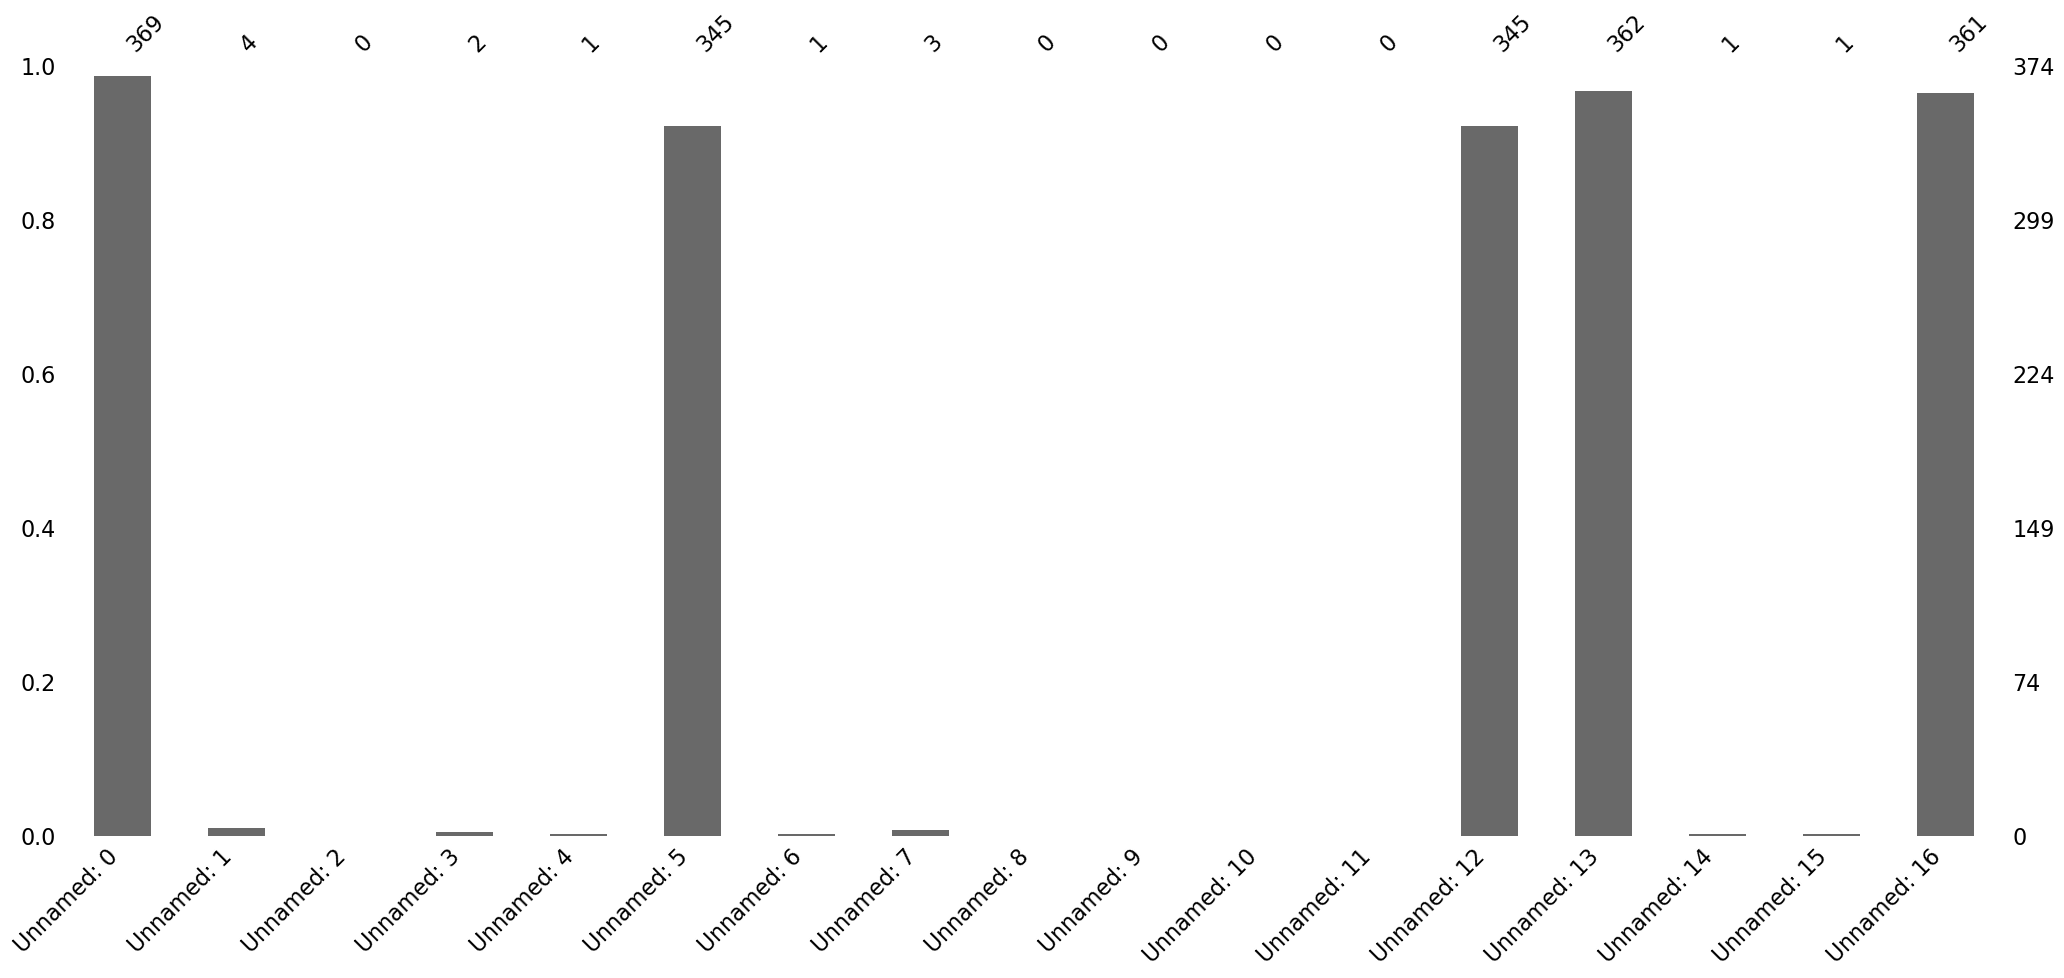

In [6]:
msno.bar(source_stocks_df)  # просмотр пустых или неполных столбцов

<Axes: >

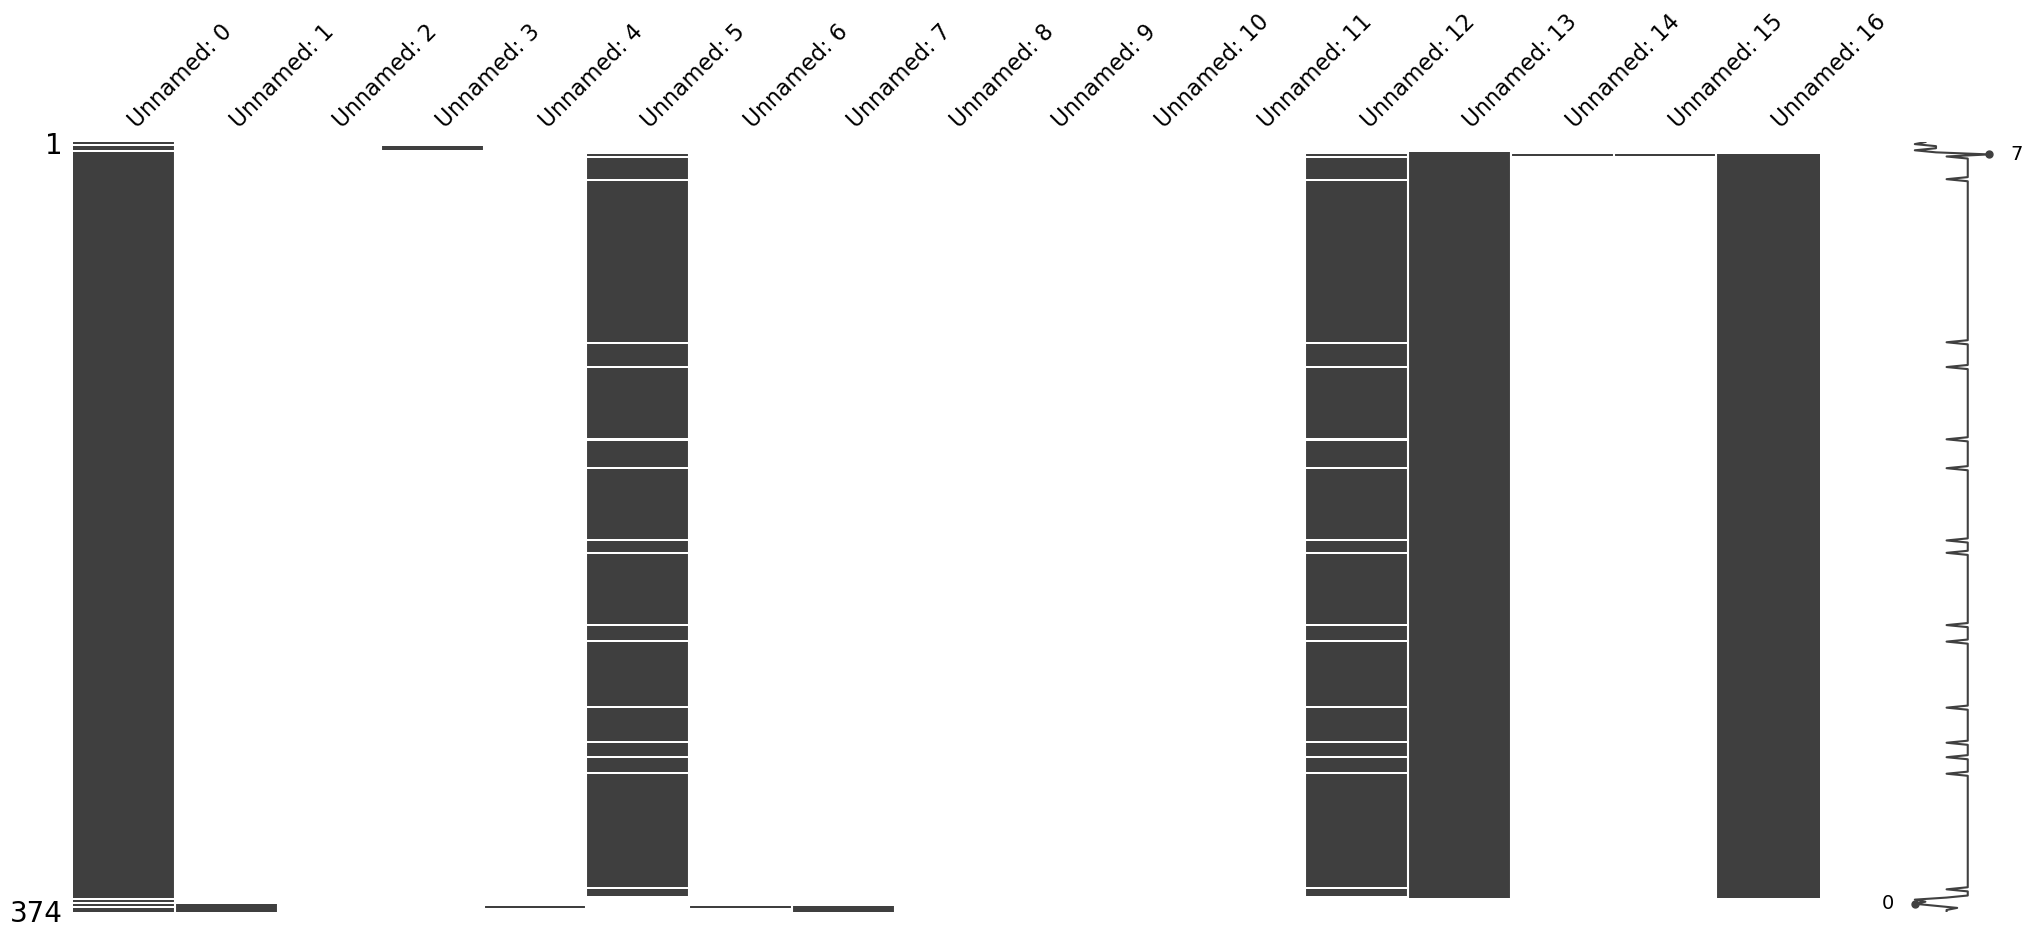

In [8]:
msno.matrix(source_stocks_df)  # просмотр пустых или неполных строк в столбцах

In [6]:
new_header = source_stocks_df.iloc[6]  # выбирается строка 6 в качестве заголовка
new_stocks_df = pd.DataFrame(source_stocks_df.iloc[7:])  # отбрасывается исходный заголовок
new_stocks_df.rename(columns=new_header, inplace=True)  # заменяется исходный заголовок новым, т.е. строкой 6
df = new_stocks_df.dropna(subset=['Номенклатура'], axis=0)  # удаляются строки с пустыми ячейками в столбце "Номенклатура"
working_df = df.dropna(axis=1)  # удаляются столбцы с пустыми ячейками
edited_header = working_df.columns.map(lambda x: x.replace(' ', '_'))  # пробелы в названиях колонок заменяются на нижнее подчеркивание 
working_df.columns = edited_header  # названия колонок без пробелов
working_df.reset_index(drop=True, inplace=True)  # сбрасываются индексы
working_df = working_df.drop(['Ед._изм.', 'Начальный_остаток'], axis=1)  # удаляются неинформативные колонки
working_df.Конечный_остаток = pd.to_numeric(working_df.Конечный_остаток)  # изменяется тип данных object на int64 в колонке "Конечный_остаток"

print(f'\nРазмер рабочего датафрейма (таблицы): {working_df.shape[0]} строки на {working_df.shape[1]} колонки.\n')
working_df.head()


Размер рабочего датафрейма (таблицы): 344 строки на 3 колонки.



,Артикул,Номенклатура,Конечный_остаток
0,C.01.SPF02.0012,Газовый водонагреватель ВПГ 4-10Т C.01.SPF02...,196
1,C.01.SPF02.0019,Газовый водонагреватель ВПГ2-14ММ C.01.SPF02...,18
2,C.01.SPF02.0015,Газовый водонагреватель ВПГ 3-10 C.01.SPF02.0...,2
3,C.01.SPF02.0020,Газовый водонагреватель ВПГ2-11ЭМ 11 л C.01.S...,196
4,C.01.SPF02.0021,Газовый водонагреватель ВПГ2-14ЭМ C.01.SPF02.0...,18


In [12]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Артикул           344 non-null    object
 1   Номенклатура      344 non-null    object
 2   Конечный_остаток  344 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


In [14]:
working_df.Артикул.describe()

count                 344
unique                 88
top       CB.002.0203.001
freq                   13
Name: Артикул, dtype: object

In [16]:
working_df.Номенклатура.describe()

count                                            344
unique                                            99
top       Котел газовый MIZUDO M24T  CB.002.0203.001
freq                                              10
Name: Номенклатура, dtype: object

In [18]:
working_df.Конечный_остаток.describe()

count     344.000000
mean       46.813953
std       113.743152
min         1.000000
25%         4.000000
50%         8.000000
75%        35.250000
max      1016.000000
Name: Конечный_остаток, dtype: float64

In [8]:
working_df['Номенклатура_edited'] = working_df.Номенклатура.str.lower()
working_df['Номенклатура_edited'] = working_df.Номенклатура_edited.str.replace('впг', '')
working_df['Номенклатура_edited'] = working_df.Номенклатура_edited.str.replace('gb', '')
working_df['Номенклатура_edited'] = working_df.Номенклатура_edited.str.replace('eco', '')
working_df['Номенклатура_edited'] = working_df.Номенклатура_edited.str.replace('газовый котел', 'котел газовый')
working_df[['Номенклатура', 'Номенклатура_edited']].head()

,Номенклатура,Номенклатура_edited
0,Газовый водонагреватель ВПГ 4-10Т C.01.SPF02...,газовый водонагреватель 4-10т c.01.spf02.0012
1,Газовый водонагреватель ВПГ2-14ММ C.01.SPF02...,газовый водонагреватель 2-14мм c.01.spf02.0019
2,Газовый водонагреватель ВПГ 3-10 C.01.SPF02.0...,газовый водонагреватель 3-10 c.01.spf02.0015
3,Газовый водонагреватель ВПГ2-11ЭМ 11 л C.01.S...,газовый водонагреватель 2-11эм 11 л c.01.spf0...
4,Газовый водонагреватель ВПГ2-14ЭМ C.01.SPF02.0...,газовый водонагреватель 2-14эм c.01.spf02.0021


In [52]:
pattern = r'[a-zа-я]{1,2}\d{1,4}[a-zа-я]{0,3}|[a-zа-я]{1,2}\d{1,4}[a-zа-я]{0,3}-[a-zа-я]{0,5}|\d{1}-\d{2}[а-яa-z]{0,2}'
working_df['Модель'] = working_df.Номенклатура_edited.apply(lambda x: re.search(pattern, x))
working_df['Модель'] = working_df.Модель.apply(lambda x: x.group(0))
working_df.head()

,Артикул,Номенклатура,Конечный_остаток,Номенклатура_edited,Модель
0,C.01.SPF02.0012,Газовый водонагреватель ВПГ 4-10Т C.01.SPF02...,196,газовый водонагреватель 4-10т c.01.spf02.0012,4-10т
1,C.01.SPF02.0019,Газовый водонагреватель ВПГ2-14ММ C.01.SPF02...,18,газовый водонагреватель 2-14мм c.01.spf02.0019,2-14мм
2,C.01.SPF02.0015,Газовый водонагреватель ВПГ 3-10 C.01.SPF02.0...,2,газовый водонагреватель 3-10 c.01.spf02.0015,3-10
3,C.01.SPF02.0020,Газовый водонагреватель ВПГ2-11ЭМ 11 л C.01.S...,196,газовый водонагреватель 2-11эм 11 л c.01.spf0...,2-11эм
4,C.01.SPF02.0021,Газовый водонагреватель ВПГ2-14ЭМ C.01.SPF02.0...,18,газовый водонагреватель 2-14эм c.01.spf02.0021,2-14эм


In [54]:
working_df.to_csv('stocks_report.csv', index=False)